In [96]:
import pandas as pd
import os
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [63]:
os.listdir()
df_i = pd.read_csv('heart.csv')

In [64]:
df_i.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
1,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
2,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
3,61,M,ASY,120,282,0,ST,135,Y,4.0,Down,1
4,64,M,ASY,134,273,0,Normal,102,Y,4.0,Down,1


In [65]:
cols = df_i.columns
for i in cols:
    print(i)

Age
Sex
ChestPainType
RestingBP
Cholesterol
FastingBS
RestingECG
MaxHR
ExerciseAngina
Oldpeak
ST_Slope
HeartDisease


In [66]:
df_i.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

## Data Preprocessing
### Object columns needs encoded
#### OHE is chosen since all object columns contain nominal data.  Further, there are no more than 3 unique objects/column and the dataset is small

In [83]:
object_cols.remove('Sex')

In [178]:
object_cols = df_i.select_dtypes(include='object')
object_cols = [i for i in object_cols.columns]
Labels = []
for col in object_cols:
    if df_i[col].nunique() == 2:
        Labels.append(col)
        object_cols.remove(col)

ohc = OneHotEncoder()
#object_cols = [object_cols[0]]
data_ohc = df_i.copy()

for col in object_cols:
    dat = np.array(data_ohc[col])
    data_ohc = data_ohc.drop(col, axis=1) #drop this column name, look along column
    new_dat = ohc.fit_transform(dat.reshape(-1,1)) #ohc takes this [[], [], ..., []] format
    n_cols = new_dat.shape[1]
    feature_names = ohc.get_feature_names()
    feature_names = [i.split('_')[-1] for i in feature_names]
    col_names = ['_'.join([col, str(x)]) for x in feature_names]
    
    new_df = pd.DataFrame(new_dat.toarray(), 
                          index=data_ohc.index,
                          columns=col_names)

    data_ohc = pd.concat([data_ohc, new_df],axis=1) #axis = 1 tells it to join on index.  Omission appends dfs rowwise

Legend = []
for label in Labels:
    dat = np.array(data_ohc[label])
    data_ohc = data_ohc.drop(label, axis=1)
    dat_le = le.fit_transform(dat)
    data_ohc[label] = dat_le
    Legend.append(np.array(le.classes_))

df_legend = pd.DataFrame(Legend, index = Labels)# columns = Labels,)

df_legend.transpose()

,Sex,ExerciseAngina
0,F,N
1,M,Y


In [179]:
data_ohc

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up,Sex,ExerciseAngina
0,55,140,217,0,111,5.6,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
1,50,140,231,0,140,5.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1,1
2,51,140,298,0,122,4.2,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,1
3,61,120,282,0,135,4.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1,1
4,64,134,273,0,102,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,63,100,0,1,109,-0.9,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0
914,56,115,0,1,82,-1.0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,0
915,38,100,0,0,179,-1.1,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0
916,56,125,0,1,98,-2.0,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1,0


In [70]:
df_corr = df_p.corr()

df_corr.to_csv('Corr.csv')

### I might need to drop the second columns for sex and exercise angina.  These were the only two binary values and they are perfectly correlated with each other in the correlation matrix.

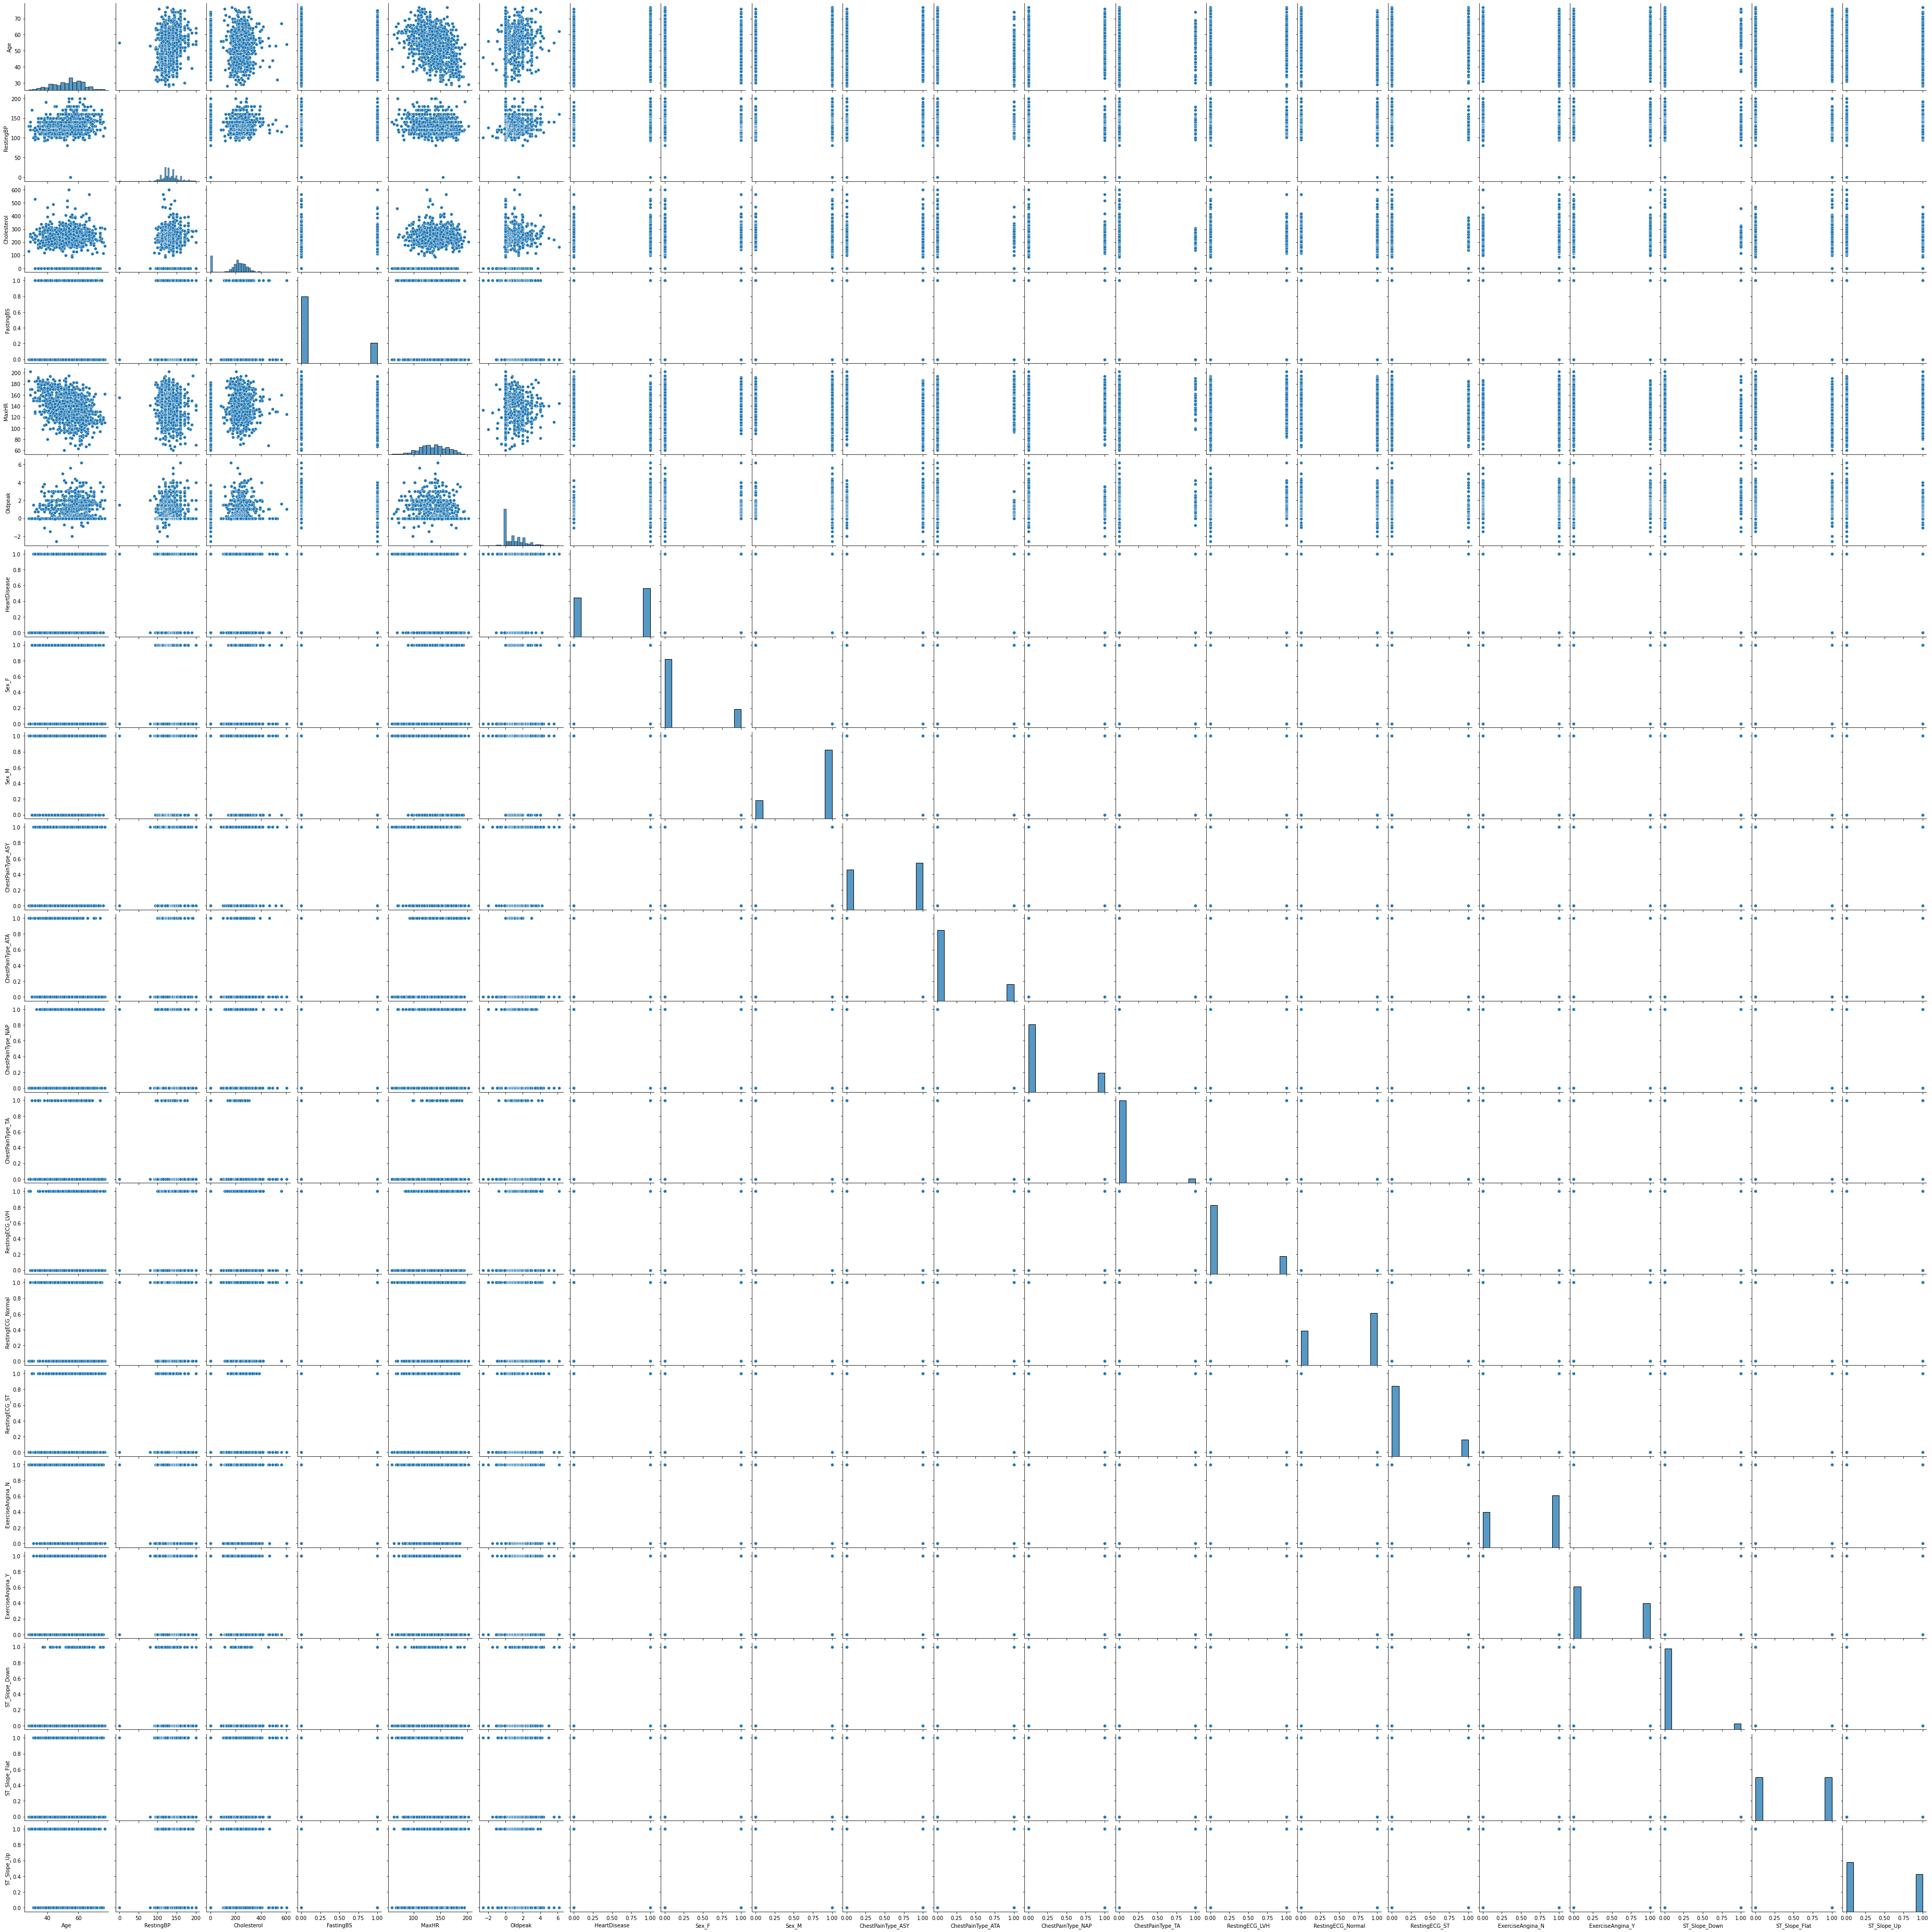

In [69]:
sns.pairplot(df_p)